In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def traffic_ca(steps, size, rho):
    speeds = []
    
    # Initialize the cells with size and time steps
    cells = np.zeros((steps,size))
    
    # Set up cells with initial cars
    cells[0,:int(rho*size)] = 1
    np.random.shuffle(cells[0])
    
    # Set up lookup table
    lookup_table = [0,0,0,1,1,1,0,1]
  
    # Step through all time steps and update all elements
    for i in range(steps-1):
        for j in range(size):
            left = (j-1)%size
            right = (j+1)%size
            index = 4*cells[i,left]+2*cells[i,j]+cells[i,right]
            cells[i+1,j] = lookup_table[int(index)]
            if (i > 50 and cells[i,j] == 1):
                if (cells[i+1,j] == 0):
                    speeds.append(1)
                else:
                    speeds.append(0)
    
    return cells, speeds
    

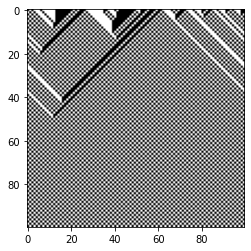

In [12]:
steps = 100
size = 100
rho = 0.5 # Density of cars

# Seed the random number generator
np.random.seed(0)

# Calculate x
cells, speeds = traffic_ca(steps, size, rho)

# Plot it!
plt.imshow(cells,cmap='binary')

We can use this to calculate information about the flow of traffic under different traffic densities.

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Average Speed after time 50')

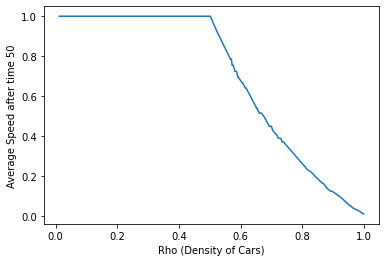

In [13]:
all_speeds = []
rhos = sorted(np.random.random(100))

for rho in rhos:
    x, speed = traffic_ca(steps, size, rho)
    all_speeds.append(np.mean(speed))
    
plt.plot(rhos, all_speeds)
plt.xlabel("Rho (Density of Cars)")
plt.ylabel("Average Speed after time 50")